**Project Decision Tree based on Education dataset**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
mydata=pd.read_csv("xAPI-Edu-Data.csv")

In [11]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [8]:
mydata.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [12]:
mydata=mydata.drop('NationalITy',axis=1)

In [13]:
mydata=mydata.drop('PlaceofBirth',axis=1)

In [14]:
mydata

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [9]:
#Using Label Encoder to convert the object type variables into numerical type
from sklearn.preprocessing import LabelEncoder

In [10]:
LE = LabelEncoder()

In [15]:
mydata.gender = LE.fit_transform(mydata.gender)
mydata.StageID = LE.fit_transform(mydata.StageID)
mydata.GradeID = LE.fit_transform(mydata.GradeID)
mydata.SectionID = LE.fit_transform(mydata.SectionID)
mydata.Topic = LE.fit_transform(mydata.Topic)
mydata.Semester = LE.fit_transform(mydata.Semester)
mydata.Relation = LE.fit_transform(mydata.Relation)
mydata.ParentAnsweringSurvey = LE.fit_transform(mydata.ParentAnsweringSurvey)
mydata.ParentschoolSatisfaction = LE.fit_transform(mydata.ParentschoolSatisfaction)
mydata.StudentAbsenceDays = LE.fit_transform(mydata.StudentAbsenceDays)
mydata.Class = LE.fit_transform(mydata.Class)

In [16]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    480 non-null    int64
 1   StageID                   480 non-null    int64
 2   GradeID                   480 non-null    int64
 3   SectionID                 480 non-null    int64
 4   Topic                     480 non-null    int64
 5   Semester                  480 non-null    int64
 6   Relation                  480 non-null    int64
 7   raisedhands               480 non-null    int64
 8   VisITedResources          480 non-null    int64
 9   AnnouncementsView         480 non-null    int64
 10  Discussion                480 non-null    int64
 11  ParentAnsweringSurvey     480 non-null    int64
 12  ParentschoolSatisfaction  480 non-null    int64
 13  StudentAbsenceDays        480 non-null    int64
 14  Class                     480 non-null    

In [17]:
mydata.describe()

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.635417,1.345833,2.906250,0.472917,5.256250,0.489583,0.410417,46.775000,54.797917,37.918750,43.283333,0.562500,0.608333,0.602083,1.143750
std,0.481815,0.603732,2.464267,0.612411,3.388388,0.500413,0.492423,30.779223,33.080007,26.611244,27.637735,0.496596,0.488632,0.489979,0.846312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,15.750000,20.000000,14.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,5.000000,0.000000,0.000000,50.000000,65.000000,33.000000,39.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,5.000000,1.000000,7.000000,1.000000,1.000000,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,2.000000,9.000000,2.000000,11.000000,1.000000,1.000000,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000,1.000000,2.000000


In [18]:
mydata_corr=mydata.corr()

In [19]:
mydata_corr

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
gender,1.000000,-0.017793,0.016869,0.054907,0.031769,0.049156,-0.195142,-0.149978,-0.210932,-0.052139,-0.124703,-0.022359,-0.093478,-0.209011,0.123675
StageID,-0.017793,1.000000,-0.961835,0.296416,-0.047493,-0.029512,0.034205,-0.172751,-0.068621,-0.163666,-0.161406,-0.114025,0.014272,-0.112536,-0.011696
GradeID,0.016869,-0.961835,1.000000,-0.303949,0.061389,0.066079,-0.033602,0.182621,0.078262,0.183033,0.168462,0.118246,-0.018421,0.088342,0.013483
SectionID,0.054907,0.296416,-0.303949,1.000000,0.267445,0.046763,0.005783,-0.143862,-0.080909,-0.144955,-0.102538,-0.018449,-0.070405,0.037062,0.017597
Topic,0.031769,-0.047493,0.061389,0.267445,1.000000,-0.035975,-0.139487,-0.080418,-0.118144,-0.063856,0.054064,0.004730,-0.064087,-0.036537,0.103610
Semester,0.049156,-0.029512,0.066079,0.046763,-0.035975,1.000000,0.148705,0.178358,0.173219,0.287066,0.019083,0.023628,-0.025258,0.072462,-0.043287
Relation,-0.195142,0.034205,-0.033602,0.005783,-0.139487,0.148705,1.000000,0.364237,0.360240,0.339505,0.026720,0.163811,0.287698,0.219687,-0.272111
raisedhands,-0.149978,-0.172751,0.182621,-0.143862,-0.080418,0.178358,0.364237,1.000000,0.691572,0.643918,0.339386,0.316570,0.297015,0.463882,-0.231016
VisITedResources,-0.210932,-0.068621,0.078262,-0.080909,-0.118144,0.173219,0.360240,0.691572,1.000000,0.594500,0.243292,0.382472,0.363835,0.499030,-0.161748
AnnouncementsView,-0.052139,-0.163666,0.183033,-0.144955,-0.063856,0.287066,0.339505,0.643918,0.594500,1.000000,0.417290,0.396357,0.298744,0.312134,-0.143996


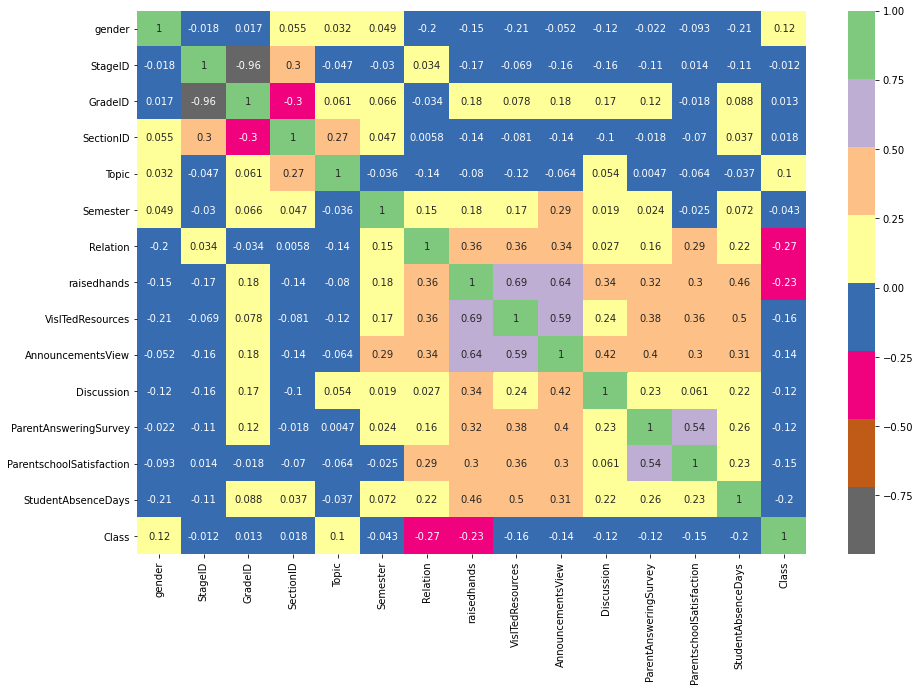

In [25]:
plt.figure(figsize=(15, 10))
sb.heatmap(data=mydata_corr, annot=True, cmap='Accent_r')
plt.show()

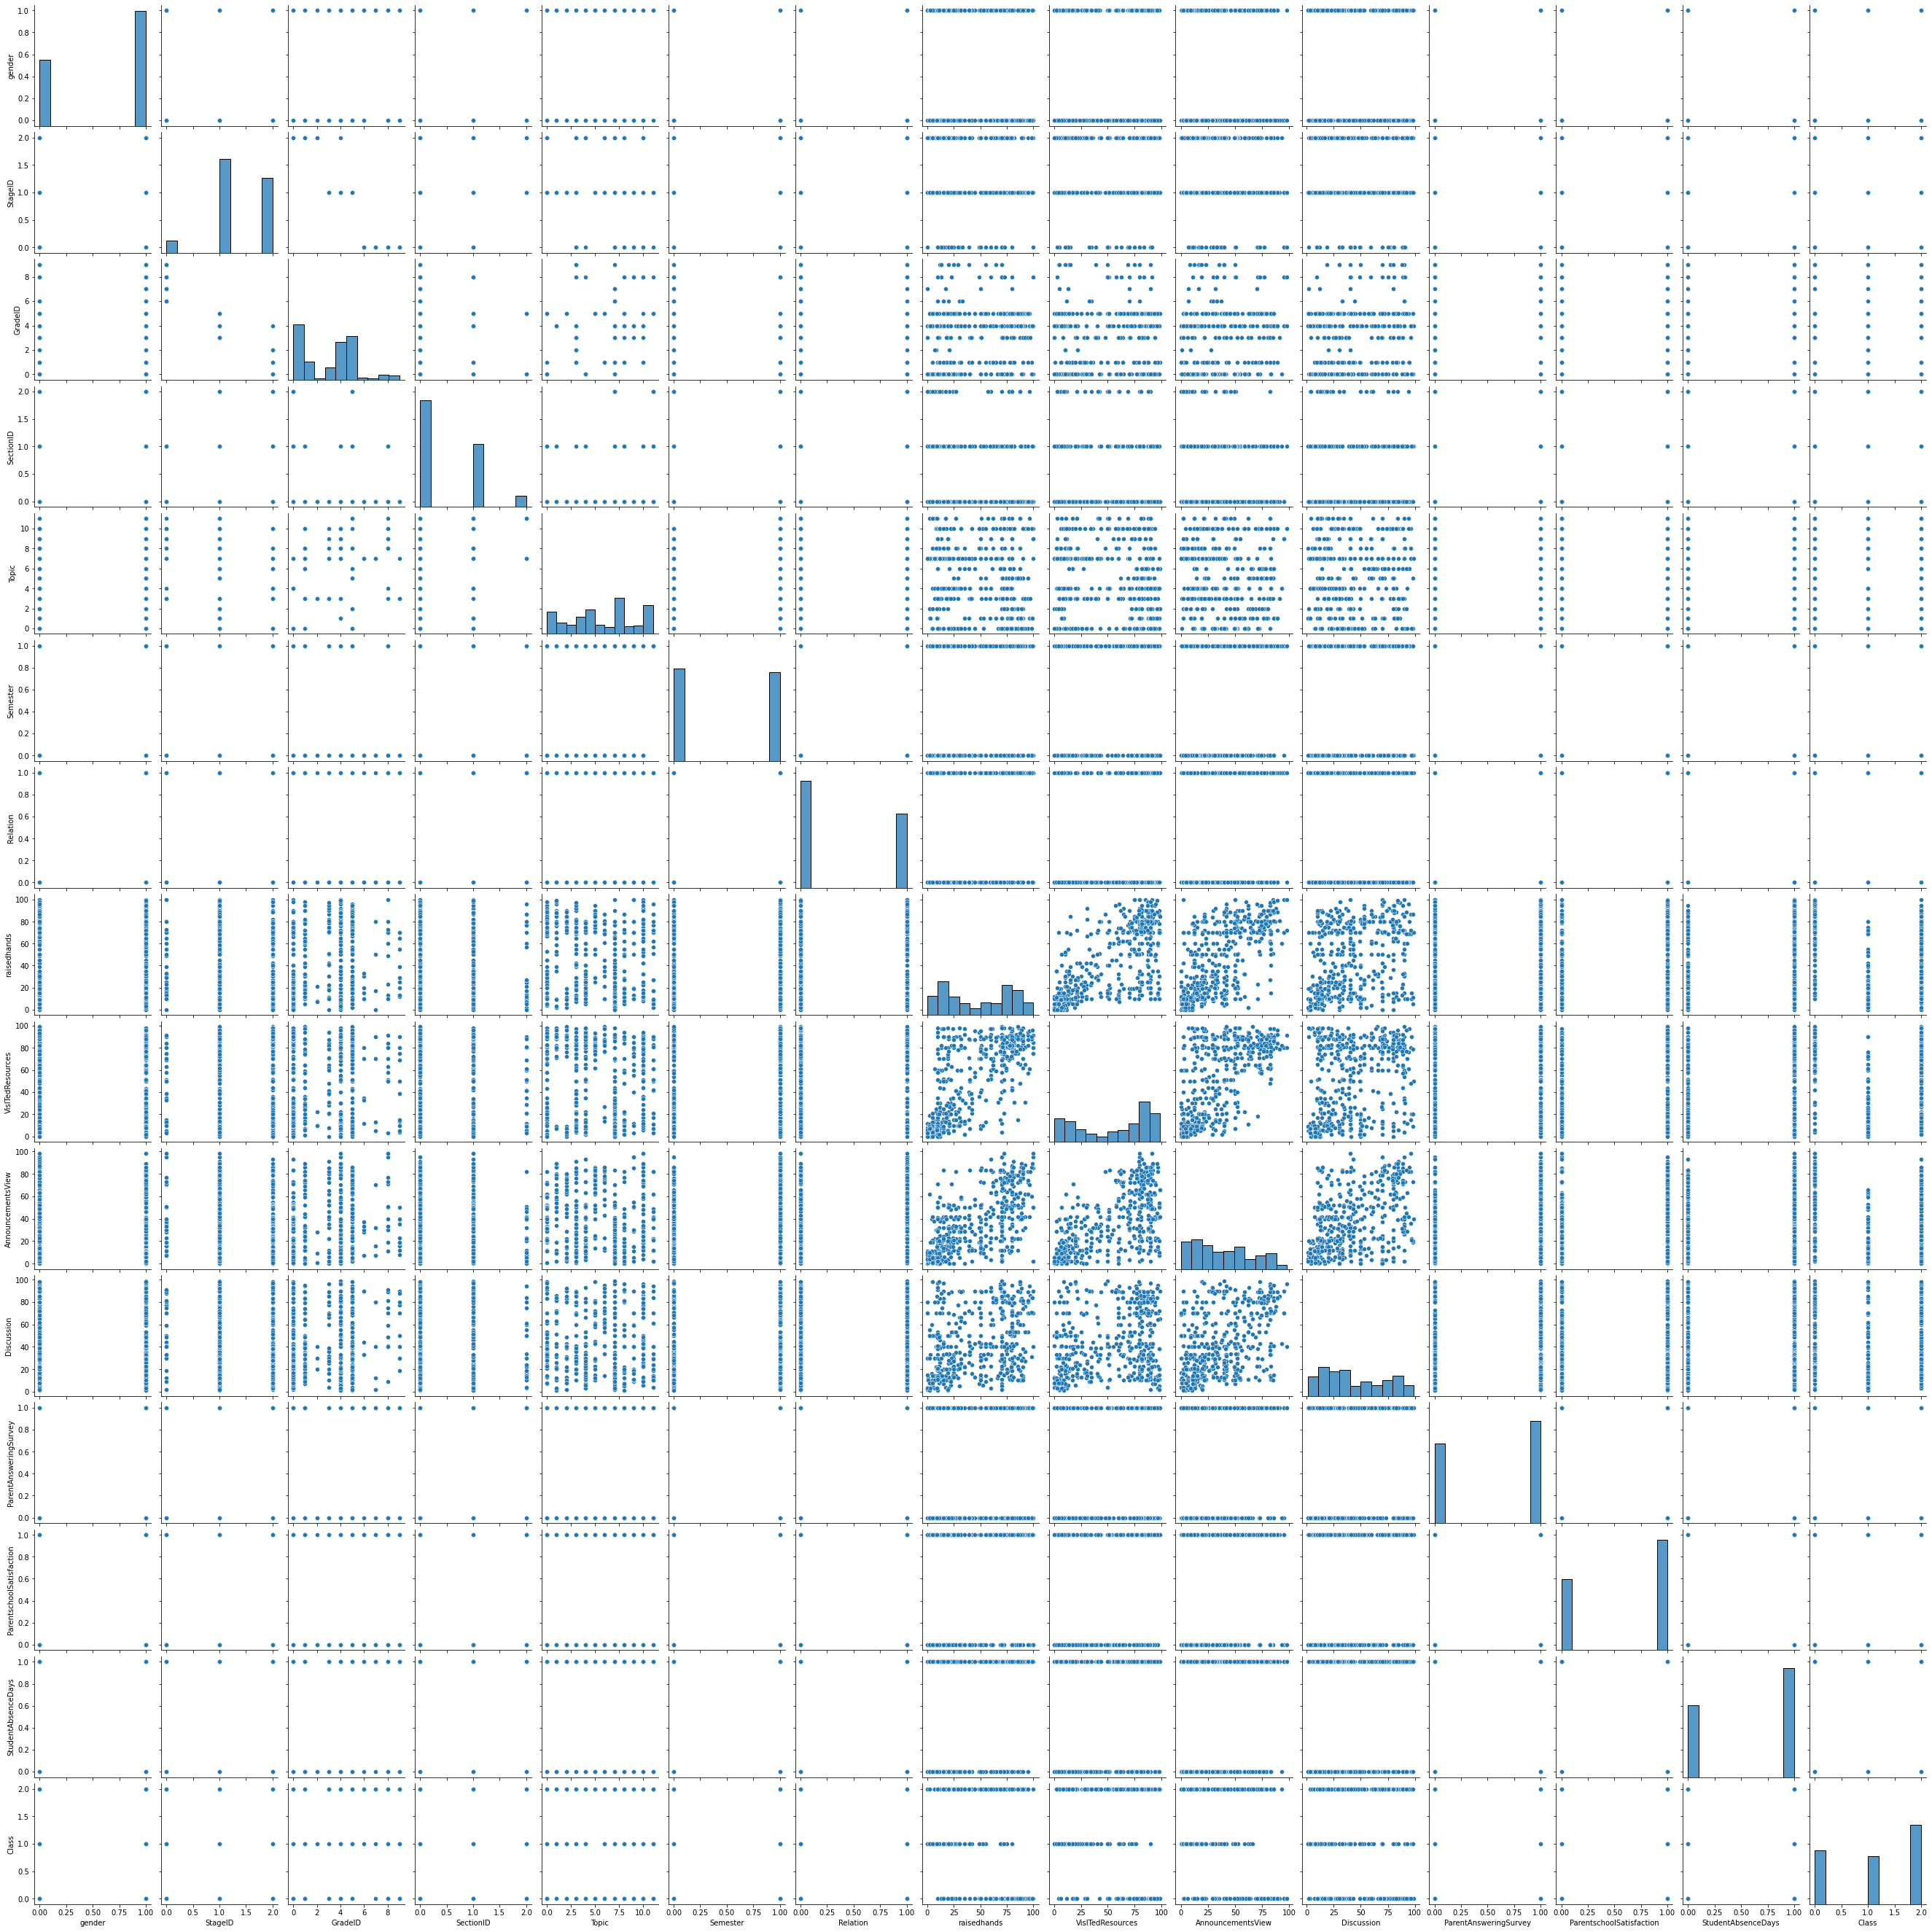

In [26]:
sb.pairplot(mydata);

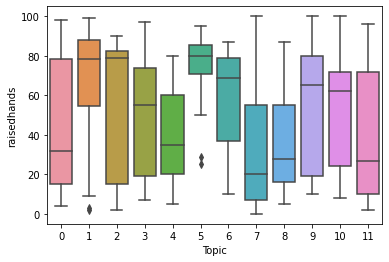

In [27]:
sb.boxplot(x="Topic",y="raisedhands",data=mydata);

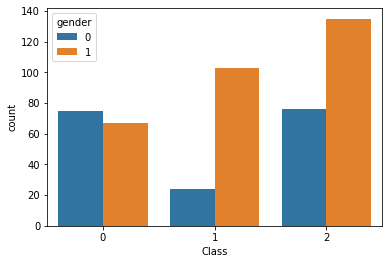

In [31]:
sb.countplot(x='Class', data=mydata, hue='gender')

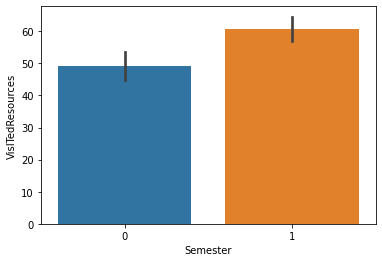

In [34]:
sb.barplot(x="Semester",y="VisITedResources",data=mydata);

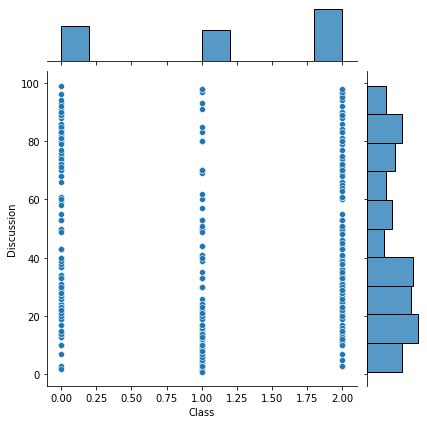

In [73]:
sb.jointplot(x="Class",y="Discussion",data=mydata);

In [35]:
y_dep=mydata.Class

In [36]:
y_dep

0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: Class, Length: 480, dtype: int64

In [38]:
x_ind=mydata.iloc[:,0:14]
x_ind

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,2,1,0,7,0,0,15,16,2,20,1,1,1
1,1,2,1,0,7,0,0,20,20,3,25,1,1,1
2,1,2,1,0,7,0,0,10,7,0,30,0,0,0
3,1,2,1,0,7,0,0,30,25,5,35,0,0,0
4,1,2,1,0,7,0,0,40,50,12,50,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,1,5,0,2,1,0,5,4,5,8,0,0,0
476,0,1,5,0,5,0,0,50,77,14,28,0,0,1
477,0,1,5,0,5,1,0,55,74,25,29,0,0,1
478,0,1,5,0,6,0,0,30,17,14,57,0,0,0


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ind, y_dep, test_size = 0.2, random_state = 2)

In [40]:
from sklearn import tree

In [41]:
model=tree.DecisionTreeClassifier(random_state=2)

In [42]:
model=model.fit(x_train,y_train)

In [43]:
y_pred=model.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [45]:
confusion_matrix(y_test,y_pred)

array([[21,  1, 12],
       [ 0, 19,  4],
       [11,  9, 19]])

In [46]:
accuracy_score(y_test,y_pred)

0.6145833333333334

In [47]:
import graphviz
from six import StringIO
from sklearn.tree import export_graphviz
import IPython
from IPython.display import Image
import pydotplus

In [48]:
my_graph=StringIO()

In [49]:
export_graphviz(model,out_file=my_graph,filled=True)

In [50]:
graph=pydotplus.graph_from_dot_data(my_graph.getvalue())

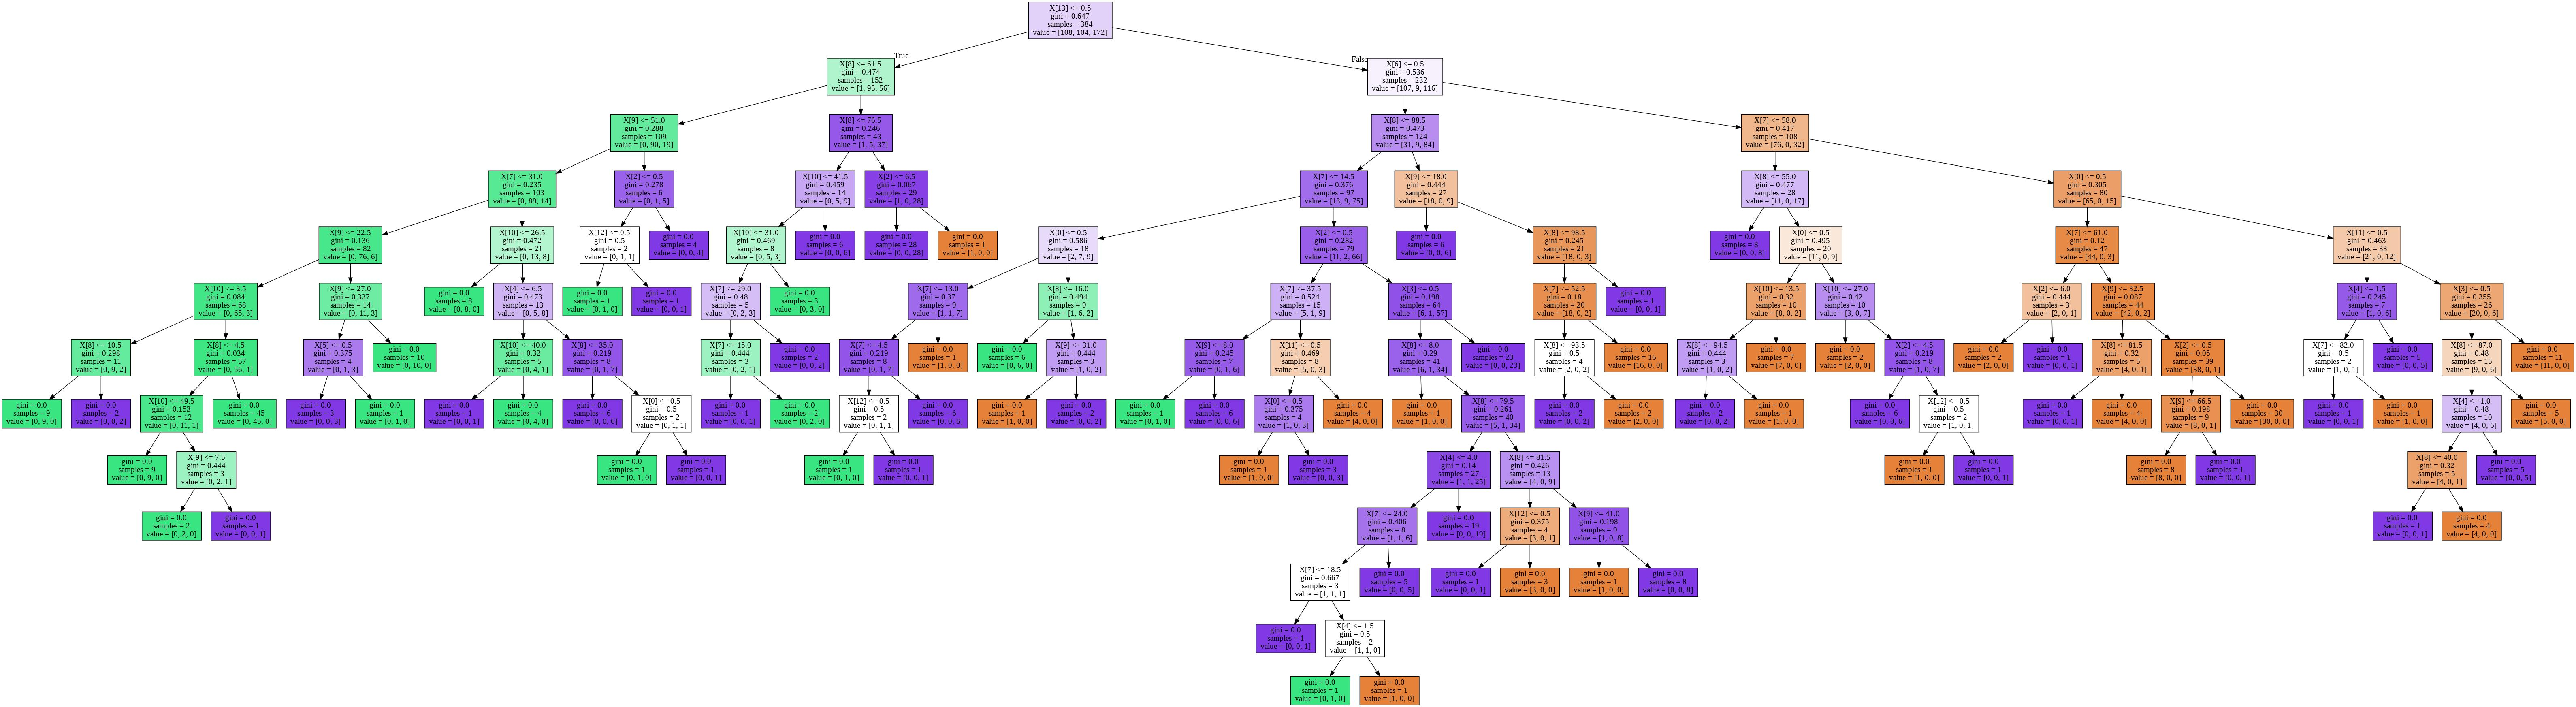

In [52]:
Image(graph.create_jpg())

# Decision tree model using Entropy

In [53]:
model_E=tree.DecisionTreeClassifier(criterion="entropy",random_state=2)

In [54]:
model_E=model_E.fit(x_train,y_train)

In [55]:
y_pred_e=model_E.predict(x_test)

In [56]:
confusion_matrix(y_test,y_pred_e)

array([[19,  1, 14],
       [ 0, 19,  4],
       [ 9,  6, 24]])

In [57]:
accuracy_score(y_test,y_pred_e)

0.6458333333333334

In [58]:
my_graph=StringIO()

In [59]:
export_graphviz(model_E,out_file=my_graph,filled=True)

In [60]:
graph=pydotplus.graph_from_dot_data(my_graph.getvalue())

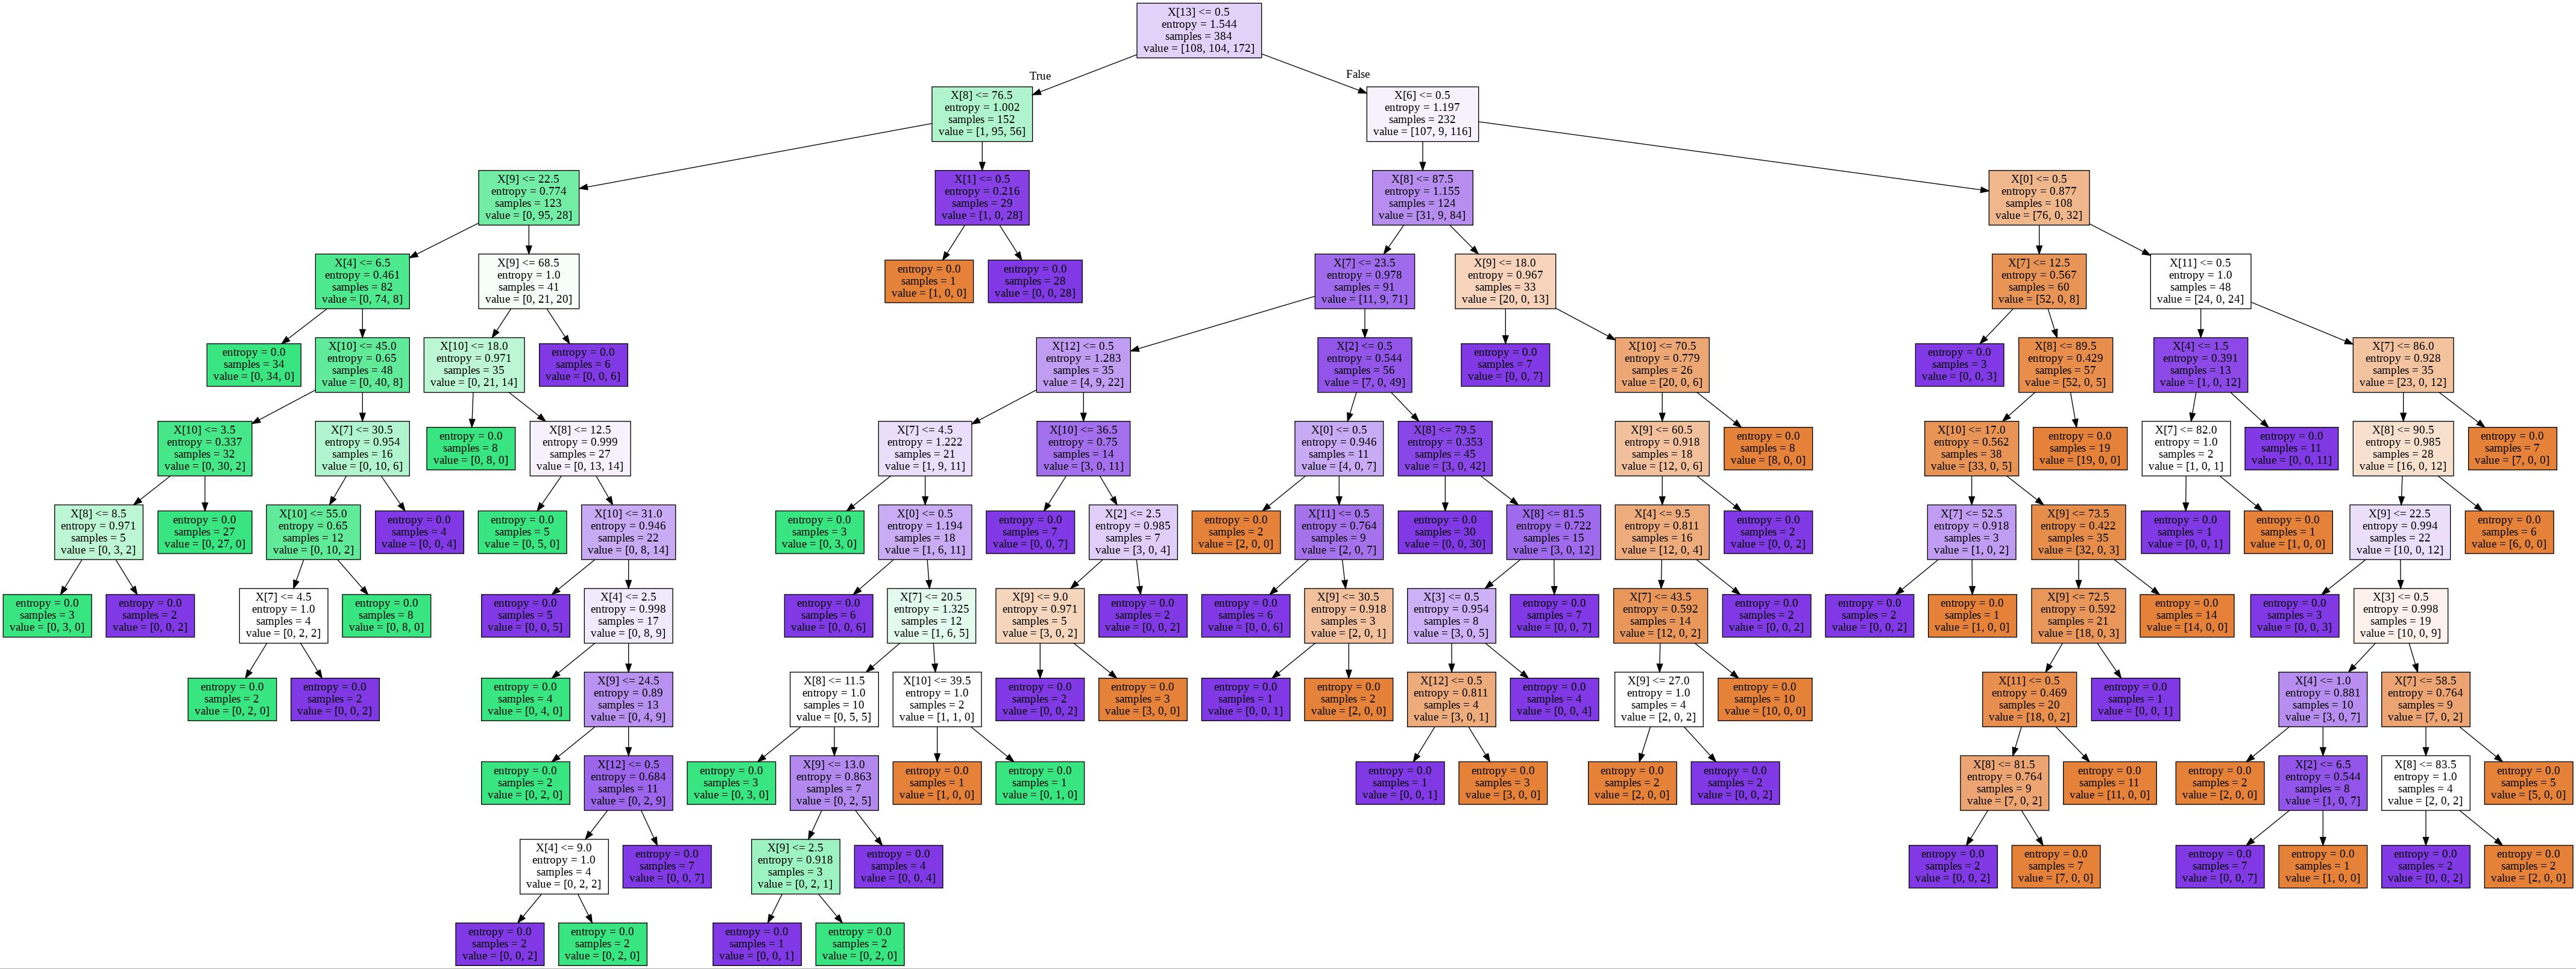

In [61]:
Image(graph.create_jpg())

#Hyperparameter tuning


In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
parameters={"max_depth":(10,20,30,40,50,60,70,100),'criterion':('gini','entropy'),
            'max_features':('log2','auto','sqrt'),'min_samples_split':(2,4,6),'random_state':(0,1,2,3)}

In [66]:
DT_hp=RandomizedSearchCV(tree.DecisionTreeClassifier(),param_distributions=parameters,cv=5)

In [67]:
DT_hp.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [68]:
model_after_Ht=tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2')

In [69]:
model_after_Ht=model_after_Ht.fit(x_train,y_train)

In [70]:
y_pred_after_hp=model_after_Ht.predict(x_test)

In [71]:
confusion_matrix(y_test,y_pred_after_hp)

array([[21,  2, 11],
       [ 0, 19,  4],
       [11,  5, 23]])

In [72]:
accuracy_score(y_test,y_pred_after_hp)

0.65625